Area Under the Curve (AUC): 0.9455128205128206


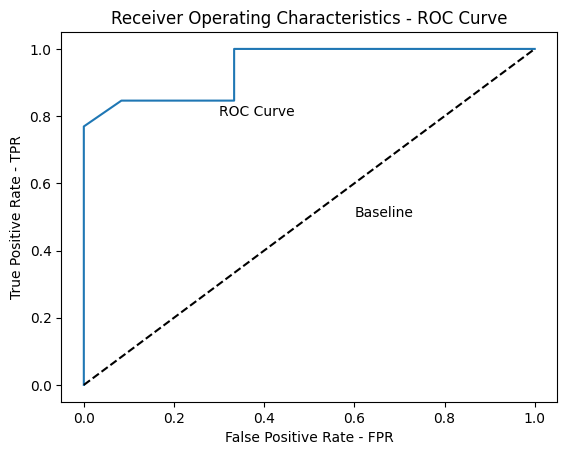

In [5]:
from sklearn import datasets
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
%matplotlib inline

# Load the iris dataset
iris = datasets.load_iris()


# Get only the setosa and versicolor data
iris_data = iris.data[0:100, :]
iris_target = iris.target[0:100]

# Split the data into train and test datasets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(iris_data[:, 0], iris_target)

# Model the data using Logistic Regression
from sklearn import linear_model

model = linear_model.LogisticRegression(C=1e5, solver='lbfgs')
model.fit(iris_data[:, 0].reshape(-1, 1), iris_target)

# Predict probabilities and compute ROC curve
probabilities = model.predict_proba(X_test.reshape(-1, 1))[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, probabilities)

# Plot the ROC curve
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], color="black", linestyle="--")

plt.xlabel("False Positive Rate - FPR")
plt.ylabel("True Positive Rate - TPR")
plt.title("Receiver Operating Characteristics - ROC Curve")
plt.text(0.6, 0.5, "Baseline")
plt.text(0.3, 0.8, "ROC Curve")

# Compute the Area Under the Curve (AUC)
roc_auc = roc_auc_score(y_test, probabilities)
print("Area Under the Curve (AUC):", roc_auc)